In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
PATH = '/Users/yngtodd/src/ornl/bayescache/output/seeds/mlp/trainloss'

In [22]:
def get_results(path):
    csvs = os.listdir(path)
    paths = [os.path.join(PATH, x) for x in csvs]
    res = [pd.read_csv(x) for x in paths]
    losses = [np.array(x['loss']) for x in res]
    losses = pd.concat([pd.Series(x) for x in losses], axis=1)
    return losses

In [23]:
def plot_loss_distribution(losses):
    """Plot aggregate results of series.

    Parameters
    ----------
    losses : pd.DataFrame
      Dataframe containing random walks as columns.
    """
    results = loss_stats(losses)
    sns.set_context("paper")
    sns.tsplot(results)


def loss_stats(losses):
    """Get mean and standard deviation of loss curves across seeds.

    Parameters
    ----------
    losses : pd.DataFrame
      Dataframe containing loss curves across seeds as columns.
    """
    mean = np.array(losses.mean(axis=1))
    std_dev = np.array(losses.std(axis=1))
    upper = mean + std_dev
    lower = mean - std_dev
    stats = [upper, mean, lower]
    return stats

In [24]:
losses = get_results(PATH)

In [31]:
df_final = losses.iloc[-1]
df_final.describe()

count    30.000000
mean      0.377698
std       0.012462
min       0.354773
25%       0.368239
50%       0.376439
75%       0.386521
max       0.402445
Name: 59999, dtype: float64

/Users/yngtodd/src/checkout/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


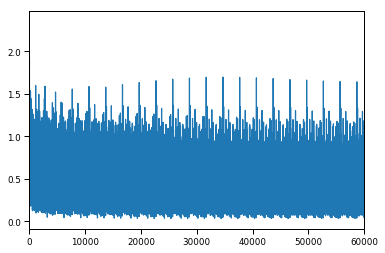

In [25]:
plot_loss_distribution(losses)